In [6]:
!poetry add scikit-learn

The following packages are already present in the pyproject.toml and will be skipped:

  - scikit-learn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from typing import Tuple 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

plt.style.use('fast')

In [8]:
data_path = '/home/hasierza/datos_originales/'
df = pd.read_csv(data_path + 'feature_frame.csv')

In [9]:
df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [10]:
df['outcome'].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [11]:
indice_max_valor = df['outcome'].idxmax()
fila_max_valor = df.loc[indice_max_valor]
print(fila_max_valor)

variant_id                               33826472919172
product_type                            ricepastapulses
order_id                                  2811116486788
user_id                                   3463900528772
created_at                          2020-10-08 09:31:35
order_date                          2020-10-08 00:00:00
user_order_seq                                        5
outcome                                             1.0
ordered_before                                      0.0
abandoned_before                                    0.0
active_snoozed                                      0.0
set_as_regular                                      0.0
normalised_price                               0.081052
discount_pct                                   0.053512
vendor                                      clearspring
global_popularity                              0.039683
count_adults                                        2.0
count_children                                  

In [12]:

df_order_especifico = df[df['order_id'] == 2811116486788]
print(df_order_especifico)
suma_outcome = df_order_especifico['outcome'].sum()

print("La suma de 'outcome' para el order_id", 2811116486788, "es:", suma_outcome)

             variant_id                product_type       order_id  \
24       33826472919172             ricepastapulses  2811116486788   
5457     34284951273604         dishwasherdetergent  2811116486788   
10662    33667302359172         cleaningaccessories  2811116486788   
14108    33667206283396  fabricconditionerfreshener  2811116486788   
23328    33667185279108    bathroomlimescalecleaner  2811116486788   
...                 ...                         ...            ...   
2846430  34284951601284          kitchenovencleaner  2811116486788   
2853289  33992554512516             babymilkformula  2811116486788   
2870235  33667304784004       superfoodssupplements  2811116486788   
2873681  33667299246212              babytoiletries  2811116486788   
2877127  33826439594116          healthcarevitamins  2811116486788   

               user_id           created_at           order_date  \
24       3463900528772  2020-10-08 09:31:35  2020-10-08 00:00:00   
5457     3463900528772 

In [13]:
df_user_especifico = df[df['user_id'] == 3463900528772]
print(df_user_especifico)

             variant_id         product_type       order_id        user_id  \
24       33826472919172      ricepastapulses  2811116486788  3463900528772   
180      33826472919172      ricepastapulses  2824721301636  3463900528772   
579      33826472919172      ricepastapulses  2847087394948  3463900528772   
5457     34284951273604  dishwasherdetergent  2811116486788  3463900528772   
5613     34284951273604  dishwasherdetergent  2824721301636  3463900528772   
...                 ...                  ...            ...            ...   
2873837  33667299246212       babytoiletries  2824721301636  3463900528772   
2874236  33667299246212       babytoiletries  2847087394948  3463900528772   
2877127  33826439594116   healthcarevitamins  2811116486788  3463900528772   
2877283  33826439594116   healthcarevitamins  2824721301636  3463900528772   
2877682  33826439594116   healthcarevitamins  2847087394948  3463900528772   

                  created_at           order_date  user_order_s

In [14]:
df_user_especifico_outcome_1 = df_user_especifico[df_user_especifico['outcome'] == 1]
orders_unicas_outcome_1 = df_user_especifico_outcome_1.groupby('order_id').size()

print("Órdenes únicas con 'outcome' igual a 1 para el usuario específico:")
print(orders_unicas_outcome_1)


Órdenes únicas con 'outcome' igual a 1 para el usuario específico:
order_id
2811116486788    10
2824721301636     4
2847087394948     5
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [16]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date'] #columnas de informacion
label_col = 'outcome'
features_cols = [col for col in df.columns if col not in info_cols + [label_col]] #columnas de features, todas menos las de info y label

cateforical_cols = ['product_type', 'vendor'] #columnas categoricas
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular'] #columnas binarias
numerical_cols = [col for col in features_cols if col not in cateforical_cols + binary_cols] #columnas numericas, todas menos las de info, label, categoricas y binarias




In [17]:
def push_relevant_dataframe(df: pd.DataFrame, min_products: int = 5) -> pd.DataFrame: # solo consideramos usuarios que han pedido al menos min_products veces, pedidos que son rentables
    """" we will only consider users that have ordered at least min_products times, orders that are profitable """
    order_size = df.groupby('order_id').outcome.sum() #cuantos productos se han comprado
    order_size_min_size = order_size[order_size >= min_products].index #nos quedamos con los orders que han comprado al menos min_products veces
    return df.loc[lambda x: x.order_id.isin(order_size_min_size)] #devolvemos el dataframe con los orders que han comprado al menos min_products veces, hacemos el filtro

df_selected = (
    df
    .pipe(push_relevant_dataframe)#aplicamos la funcion push_relevant_dataframe y nos devuelve el nuevo dataframe
    .assign(created_at = lambda x: pd.to_datetime(x.created_at)) #convertimos la columna created_at a datetime
    .assign(order_date = lambda x: pd.to_datetime(x.order_date).dt.date) # convertimos la columna order_date a datetime y nos quedamos solo con la fecha sin la hora
)

In [18]:
df.order_id.nunique() > df_selected.order_id.nunique() #comprobamos que el numero de pedidos en el dataframe original es mayor que en el nuevo dataframe

True

In [19]:
dayly_orders = df_selected.groupby('order_date').order_id.nunique() #agrupamos por fecha y contamos el numero de pedidos unicos que tenemos

In [20]:
dayly_orders.head()

order_date
2020-10-05     3
2020-10-06     7
2020-10-07     6
2020-10-08    12
2020-10-09     4
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Daily orders')

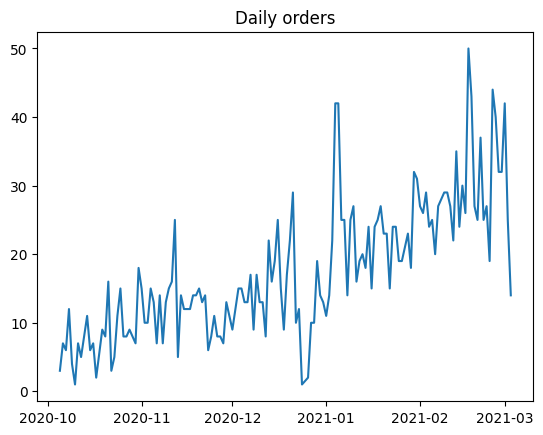

In [21]:
plt.plot(dayly_orders, label='daily orders')
plt.title('Daily orders')

As we saw during our Exploratory data analysis, there is a strong temporal evolution in the data reflecting the evolution of the underlying business. Therefore we cannot assume that the user base nor the purchasing dynamics are the same across it.

Thus, it makes senso to do a temporal spilt. By doing so, we alsko make sure that we dont want to split user orders between tran and test which will be a clear example of information lekeage.

In [22]:
cumsum_daily_orders = dayly_orders.cumsum() / dayly_orders.sum() 

train_val_cutoff = cumsum_daily_orders [cumsum_daily_orders <= 0.7].idxmax() #nos quedamos con el 70% de los datos para train 
val_test_cutoff = cumsum_daily_orders [cumsum_daily_orders <= 0.9].idxmax() # nos quedamos con el 20% de los datos para val y el resto para test

print("Train since:", cumsum_daily_orders.index.min())
print("Train until:", train_val_cutoff)

print("Val until:", val_test_cutoff)

print("Test until:", cumsum_daily_orders.index.max()) 
#hay q tener cuidado con los splits, imagina que el test solo tiene dos dias, no es representativo pero en este caso tien mas de de diez dias.

Train since: 2020-10-05
Train until: 2021-02-04
Val until: 2021-02-22
Test until: 2021-03-03


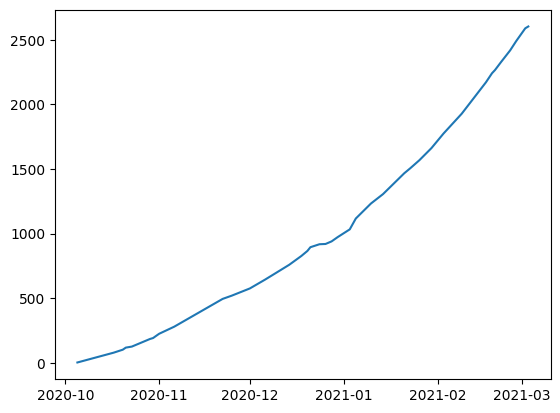

In [23]:
fig, ax = plt.subplots()

# Graficar la suma acumulativa
ax.plot(dayly_orders.cumsum(), label='Suma acumulativa')
plt.show()

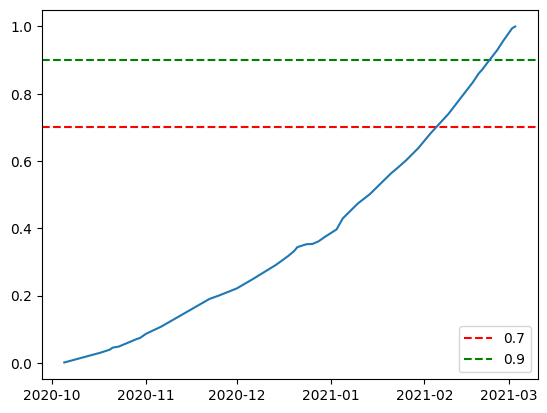

In [24]:
fig, ax = plt.subplots()

ax.axhline(y=0.7, color='r', linestyle='--', label='0.7')
ax.axhline(y=0.9, color='g', linestyle='--', label='0.9')
ax.legend()


ax.plot(cumsum_daily_orders)
plt.show()

In [25]:
train_df = df_selected[df_selected.order_date <= train_val_cutoff]
val_df = df_selected[(df_selected.order_date > train_val_cutoff) & (df_selected.order_date <= val_test_cutoff)]
test_df = df_selected[df_selected.order_date > val_test_cutoff]

se podria hacer la division por uder_id aunque mas puro es por ordeo_id

# Baseline
Nos sirve de referencia para ver q tan bueno es nuestro modelo.
In order to understan if a ML approach yields any value we need to compare against baselines that do not require training. Here we use global popularity feature as a baseline.

Now, we also need to define how are we going to evaluate different models. For this problem, since there is a clear tradeoff between how many push notifications we send and how much we manage to boost sales, we will look
at both ROC curve and precision-recall curve. 

In [26]:
def plot_metrics (
        model_name:str, y_pred:pd.Series, y_test:pd.Series, target_precision:float=0.85,
        figure: Tuple [matplotlib. figure. Figure, np.array]=None
    ):
    precision_, recall_, _ = precision_recall_curve(
        y_test, y_pred

    )
    pr_auc = auc(recall_, precision_)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    if figure is None:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    else:
        fig, ax = figure

    ax[0].plot(recall_, precision_, label=f"{model_name}; AUC: {pr_auc:.2f}")
    ax[0].set_xlabel("recall")
    ax[0].set_ylabel("precision")
    ax[0].set_title(f"Precision-recall Curve")
    ax[0].legend()

    ax[1].plot(fpr, tpr, label=f"{model_name}; AUC: {roc_auc:.2f}")
    ax[1].set_xlabel("FPR")
    ax[1].set_ylabel("TPR")
    ax[1].set_title(f"ROC Curve")
    ax[1].legend()



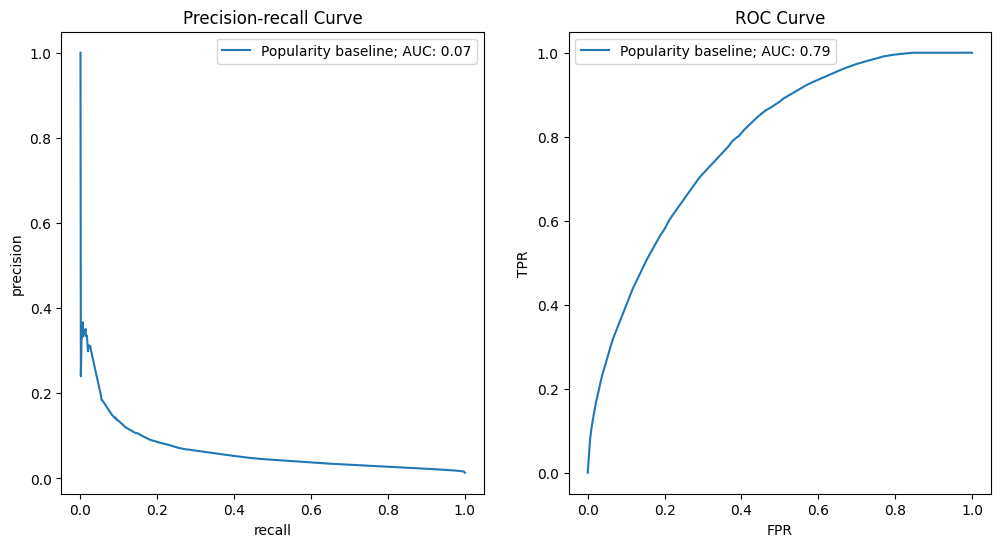

In [27]:
plot_metrics("Popularity baseline", y_pred= val_df["global_popularity"], y_test=val_df[label_col])


# Model training

In [39]:
def feature_label_split(df: pd.DataFrame, label_col: str) ->Tuple[pd.DataFrame, pd.Series]: #separamos las features del label en x e y.
    return df.drop(label_col, axis=1), df[label_col]

X_train, y_train = feature_label_split(train_df, label_col)
X_val, y_val = feature_label_split(val_df, label_col)
X_test, y_test = feature_label_split(test_df, label_col)



In [40]:
train_cols = numerical_cols + binary_cols #columnas que vamos a usar para entrenar el modelo, quitamos las categoricas porque quiero empezar con un modelo simple
#para usar las variables categoricas hay que hacer un encoding, por ejemplo one hot encoding

### Ridge regresion



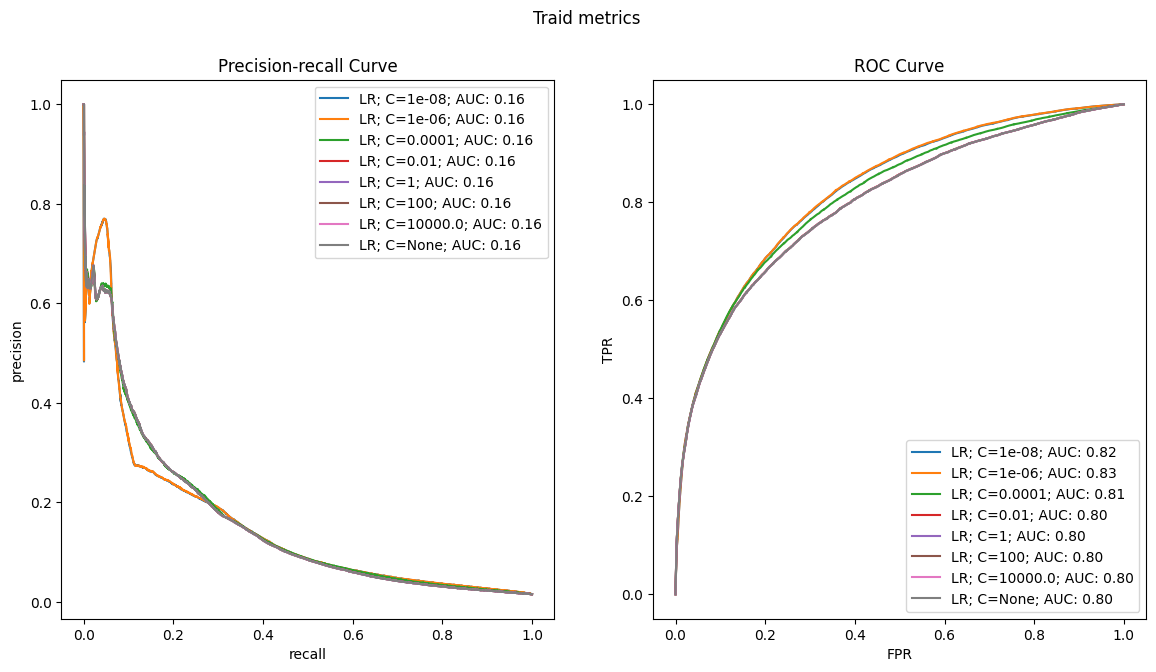

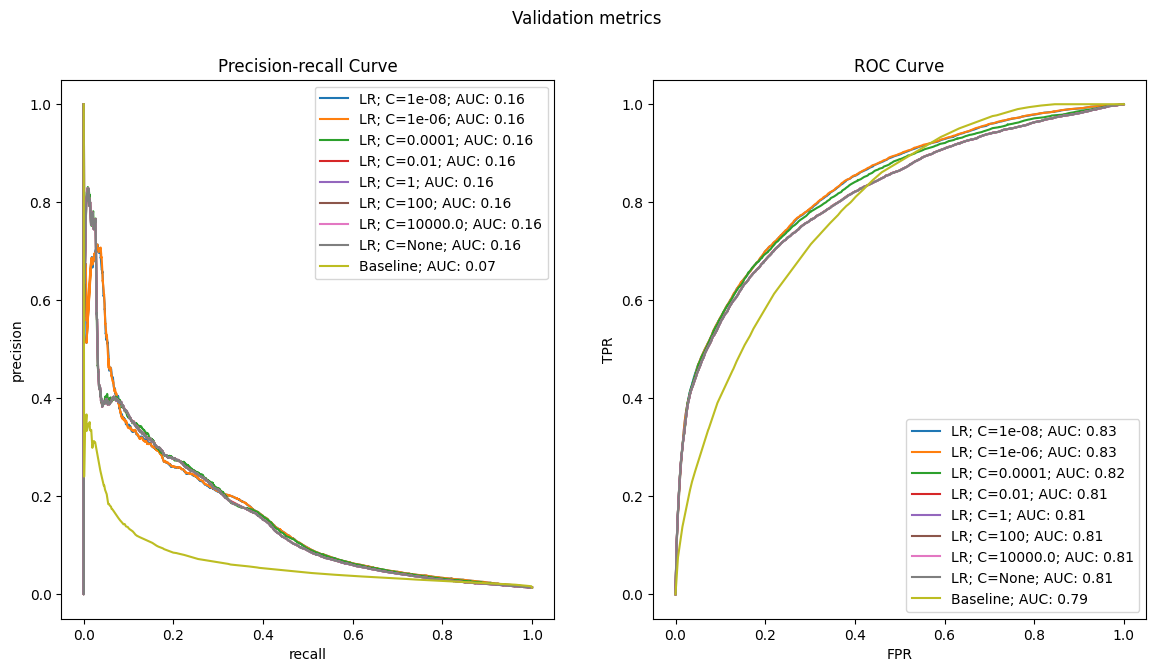

In [41]:
lr_push_train_aucs = []
lr_push_val_aucs = []
lr_push_train_ce = []
lr_push_val_ce = []

figl, ax1 = plt.subplots(1, 2, figsize=(14, 7))
figl.suptitle("Traid metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

es = [1e-8, 1e-6, 1e-4, 1e-2, 1, 100, 1e4, None]#hiperparametros que vamos a probar el alpha, el parametro de regularizacion
for c in es:
    lr = make_pipeline(#Me permite hacer diferentes pasos en un solo paso. creamos un pipeline para hacer el scaling y el modelo a la vez                                           
        StandardScaler(),#standarizamos las variables, media 0 y desviacion estandar 1. esto nos ayuda a que las variables tengan el mismo peso. para ver la importancia de las diferentes columnas. para poder comparar peras con peras
        #aqui no estamos haciendo para eso. Estamos haciendo para que el modelo converja mas rapido.
        LogisticRegression(penalty="l2" if c else None, C=c if c else 1.0) #penalizacion l2, c es el parametro de regularizacion. si c es 0 no hay regularizacion.#c si es 1e-8 es muy pequeno y hay mucha regularizacion. si es 1e4 es muy grande y hay poca regularizacion.
        #

    )
    lr.fit(X_train[train_cols], y_train)#entrenamos el modelo y calculamos las metricas con el train y luego las usando el val. pero en val usamos las standardscales que hemos calculado con el train. porque en produccion no sabemos como van a ser los datos y va ser lo mas parecido a lo que vamos a tener en produccion.
    train_proba = lr.predict_proba(X_train[train_cols])[:, 1]#nos quedamos con la probabilidad de la clase positiva [:, 1] es para que nos devuelva la segunda columna.
    plot_metrics(f"LR; C={c}", y_pred=train_proba, y_test=train_df[label_col], figure=(figl, ax1))

    val_proba = lr.predict_proba(X_val[train_cols])[:, 1]
    plot_metrics(f"LR; C={c}", y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2))

plot_metrics(f"Baseline", y_pred=val_df['global_popularity'], y_test=val_df[label_col], figure=(fig2, ax2))

#queremos estandarizar los datos de validacion  y test con la media y la desviacion estandar que he calculado en train. para que sea lo mas parecido a lo que vamos a tener en produccion.
#es probable q por la componente temporal haya diferencias entre train, val y test.

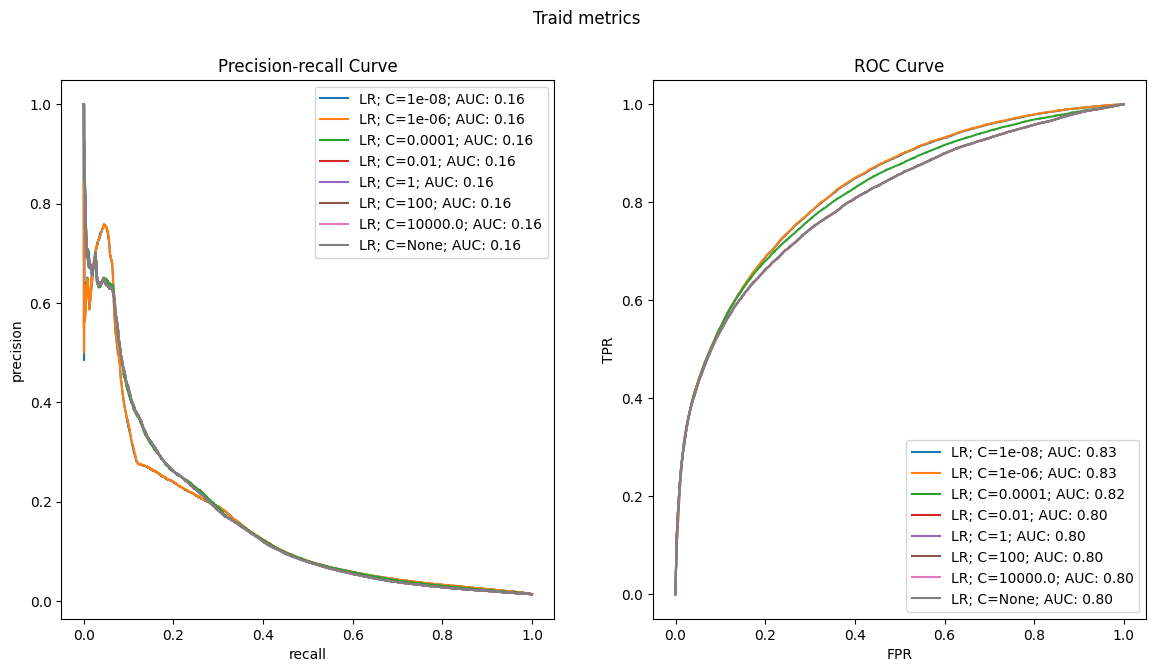

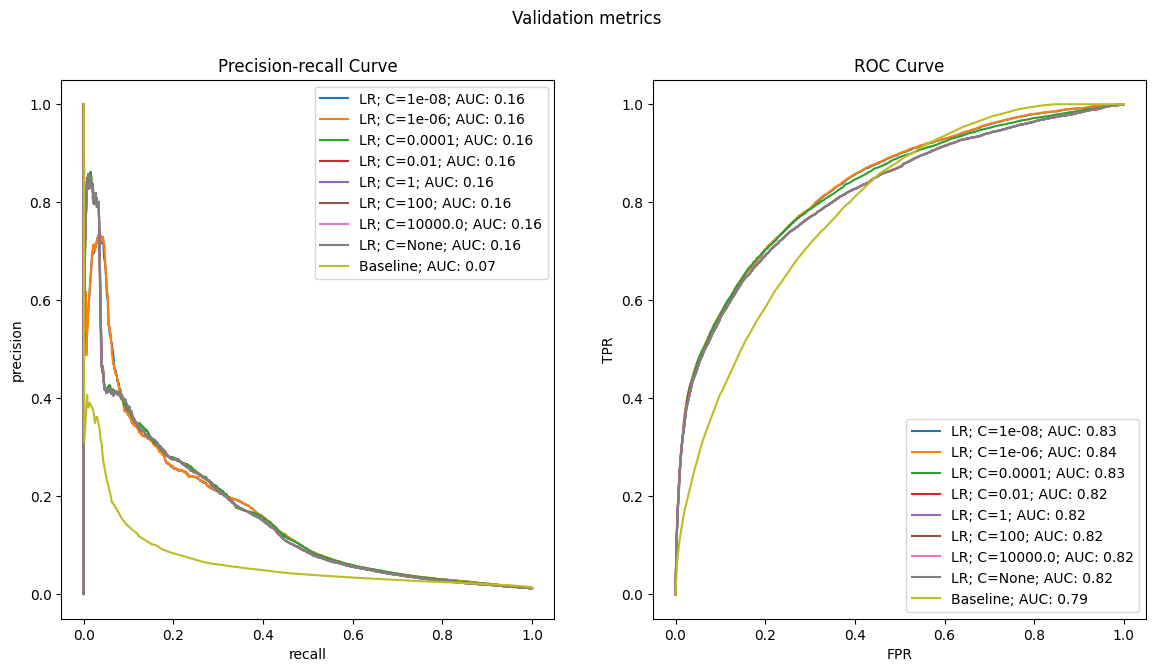

In [19]:
lr_push_train_aucs = []
lr_push_val_aucs = []
lr_push_train_ce = []
lr_push_val_ce = []

figl, ax1 = plt.subplots(1, 2, figsize=(14, 7))
figl.suptitle("Traid metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

es = [1e-8, 1e-6, 1e-4, 1e-2, 1, 100, 1e4, None]
for c in es:
    if c is None:
        lr = make_pipeline(StandardScaler(), LogisticRegression(penalty=None))
    else:
        lr = make_pipeline(StandardScaler(), LogisticRegression(penalty="l2", C=c)) #cuando c es muy pequeno hay mucha regularizacion y cuando es muy grande hay poca regularizacion. la regularizacion es laº penalizacion que le damos a los coeficientes. si hay mucha regularizacion los coeficientes son mas pequenos y si hay poca regularizacion los coeficientes son mas grandes. si hay mucha regularizacion el modelo es mas simple y si hay poca regularizacion el modelo es mas complejo.
        
    lr.fit(X_train[train_cols], y_train)
    train_proba = lr.predict_proba(X_train[train_cols])[:, 1]
    plot_metrics(f"LR; C={c}", y_pred=train_proba, y_test=train_df[label_col], figure=(figl, ax1))

    val_proba = lr.predict_proba(X_val[train_cols])[:, 1]
    plot_metrics(f"LR; C={c}", y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2))

plot_metrics(f"Baseline", y_pred=val_df['global_popularity'], y_test=val_df[label_col], figure=(fig2, ax2))


La gris es sin ninguna regularizacion.
la regularizacion nos da poca cosas parece q en la curva roc nos da algo. Pero en problemas desvalanceados hay q tener cuidado.

error de train y error de validacion son parecidos lo q nos hace indicar q no estamos aprendiendo ruido, q no hay overfitting.

Hemos metido regularizacion y hemos visto q cambia poco por lo tanto no necesita regularizacion. Q estamos haciendo al meter regularizacion, hacer mas simple nuestro modelo, reducir su complejidad y vemos q no mejora entonces sabemos q nuestro modelo no es muy complejo porque igual tenemos un dataset lo suficientemente grande y complejo. Cuanto mas grande es el dataset mas  dificil es hacer overfitting



********************************************************************************************************
Train and validation metrics are pretty much the same. There is no overfitting.
Large regularisation seem to help (somewhat better fan None) in terms of ROC AUC.

However, this is a very biased dataset lots of Negatives. The area of the ROC curve where there are differences starts with FPR > 0.3. Since most cases will be negative a FPR of 30% would mean labeling a lot of
instances as positives, most of them being FP.

On the precision-recall curve, regularisation has little to no impact in the AUC. With large regularisation penalties, the shape of the curve changes for precision > 0.4. We would need to confirm that the change in
shape is real, and if so we could choose which models better suits us depending on which point of the curve we want to work with.



### Laso

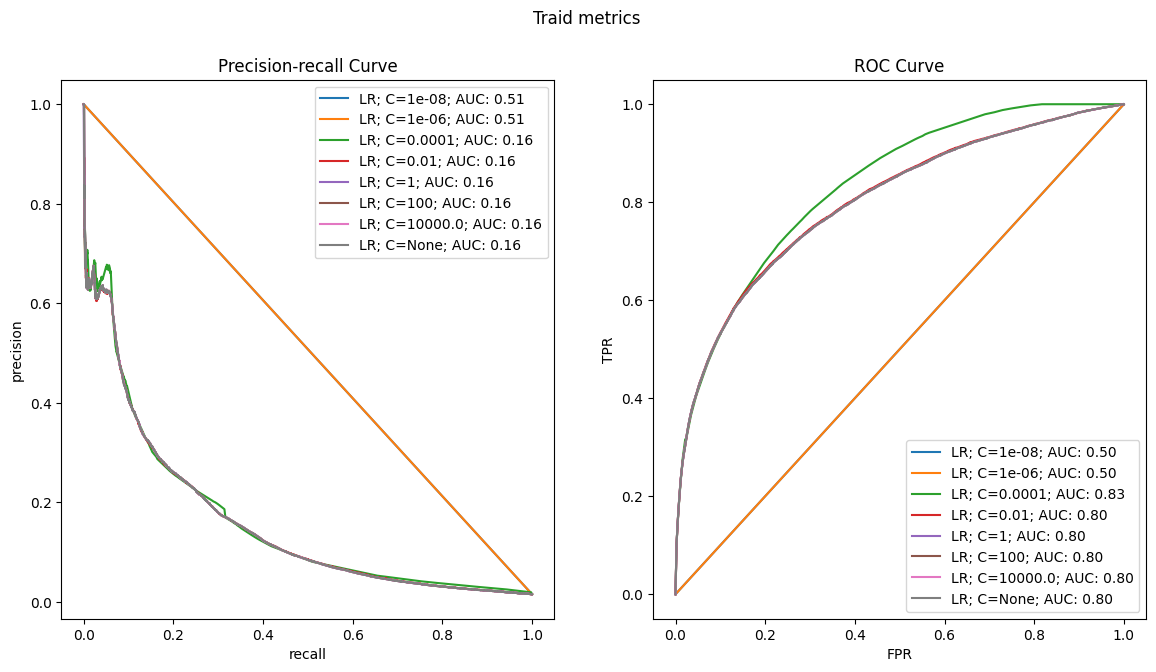

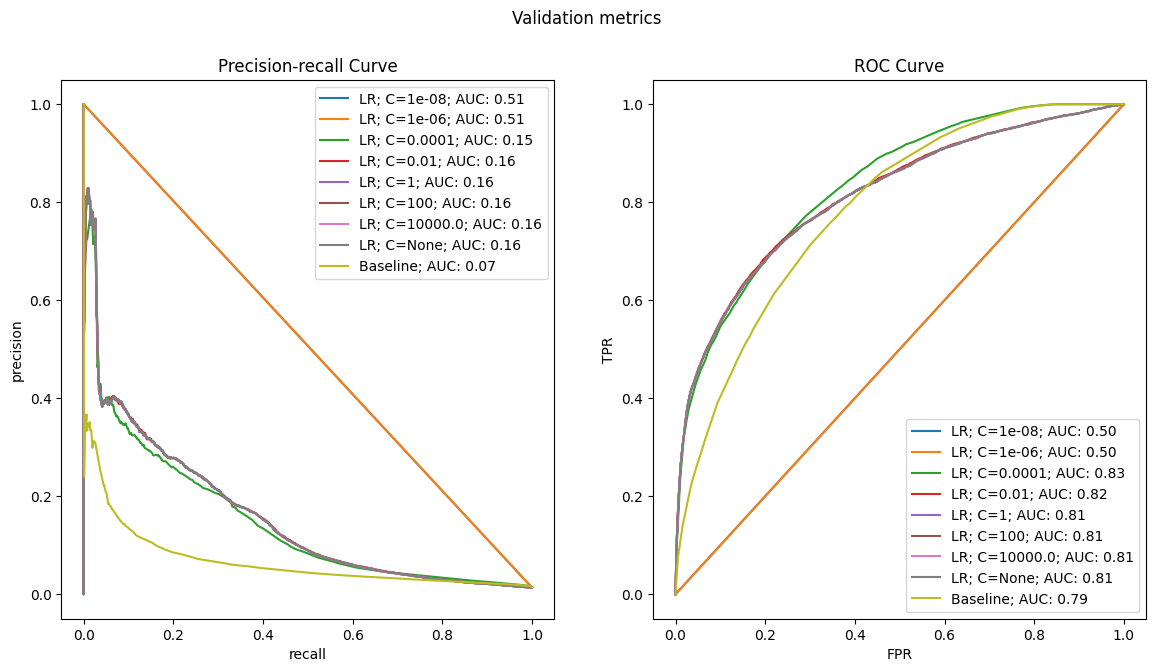

In [42]:
lr_push_train_aucs = []
lr_push_val_aucs = []
lr_push_train_ce = []
lr_push_val_ce = []

figl, ax1 = plt.subplots(1, 2, figsize=(14, 7))
figl.suptitle("Traid metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

es = [1e-8, 1e-6, 1e-4, 1e-2, 1, 100, 1e4, None]

for c in es:
    lr = make_pipeline(                                        
        StandardScaler(),
        LogisticRegression(penalty="l1" if c else None, C=c if c else 1.0, solver='saga') #solver='saga' es un solver que funciona mejor con regularizacion l1
        #c si es 1e-8 es muy pequeno y hay mucha regularizacion. si es 1e4 es muy grande y hay poca regularizacion. si es None es 1.0
    )
    lr.fit(X_train[train_cols], y_train)
    train_proba = lr.predict_proba(X_train[train_cols])[:, 1]
    plot_metrics(f"LR; C={c}", y_pred=train_proba, y_test=train_df[label_col], figure=(figl, ax1))

    val_proba = lr.predict_proba(X_val[train_cols])[:, 1]
    plot_metrics(f"LR; C={c}", y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2))

plot_metrics(f"Baseline", y_pred=val_df['global_popularity'], y_test=val_df[label_col], figure=(fig2, ax2))



Large regularisation make it work as random. The pr curve iswrong because the are only two points in the curbe, either predict everything as 0 or as 1
apart dorm that regularisatation doesnt seems to make an impact
performance is very similar to ridge

### Coeficient weigths


In [43]:
lr = Pipeline([("standard_scaler", StandardScaler()), ("lr", LogisticRegression(penalty="l2", C=1e-6))])

lr.fit(X_train[train_cols], y_train)

lr_coeff_l2 = pd.DataFrame({"features": train_cols, "importance": np.abs(lr.named_steps ["lr"].coef_[0]),  
                            "regularisation": ["l2"] * len(train_cols)})

lr_coeff_l2 = lr_coeff_l2.sort_values('importance', ascending=True)



lr = Pipeline([("standard_scaler", StandardScaler()), ("lr", LogisticRegression(penalty="l1", C=1e-4, solver="saga"))])
lr.fit(X_train[train_cols], y_train)


lr_coeff_l1 = pd.DataFrame({"features": train_cols, "importance": np.abs(lr.named_steps ["lr"].coef_[0]),
                                "regularisation": "l1"})

lr_coeff_l1 = lr_coeff_l1.sort_values('importance', ascending=True)


<Axes: xlabel='importance', ylabel='features'>

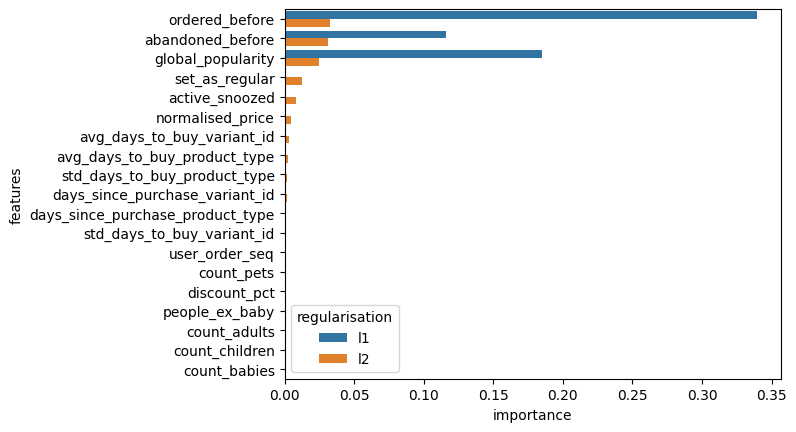

In [44]:
lr_coeff = pd.concat([lr_coeff_l2, lr_coeff_l1])
lr_coeff["features"] = pd.Categorical(lr_coeff["features"])
lr_coeff = lr_coeff.sort_values(by=["importance"])
order_columns = lr_coeff_l2.sort_values(by="importance", ascending=False)["features"]
sns.barplot(data=lr_coeff, x="importance", y="features", hue="regularisation", order=order_columns)

we observe how l1 and l2 has a differennt behavuour in how many features go to 0 


lets train the model getting rid of the non important variables.


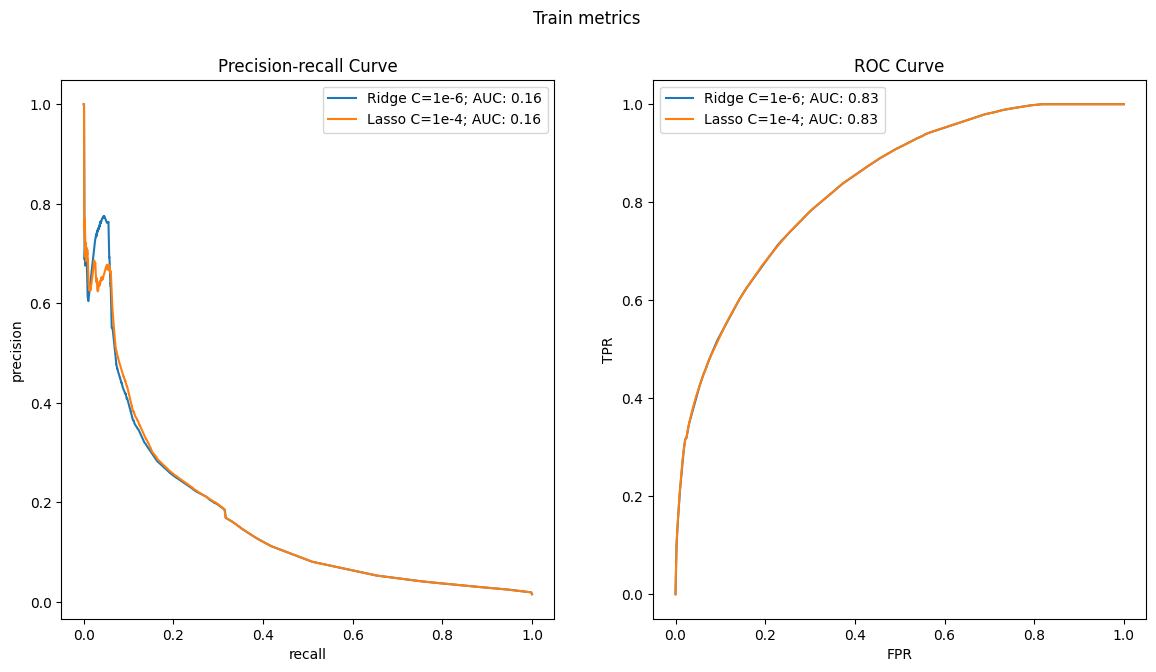

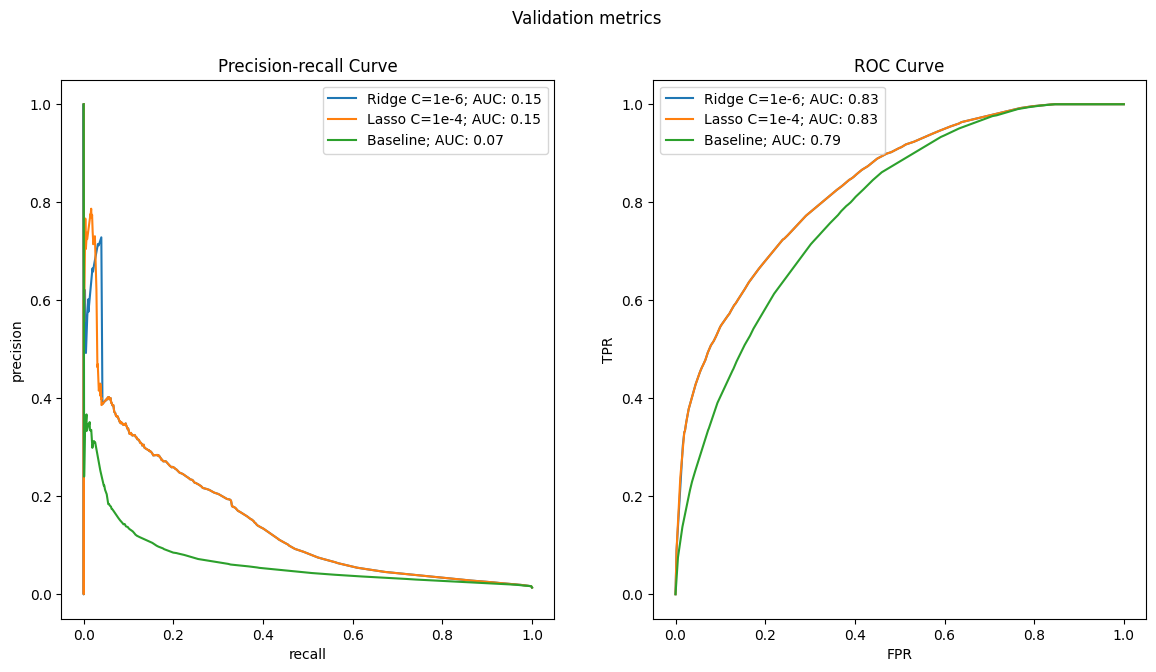

In [45]:
reduced_cols = ['ordered_before', 'abandoned_before', 'global_popularity']

fig1, ax1 = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle("Train metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

lrs = [
    make_pipeline(
        StandardScaler(), 
        LogisticRegression(penalty="l2", C=1e-6)
    ),
    make_pipeline(
        StandardScaler(), 
        LogisticRegression(penalty="l1", C=1e-4, solver='saga')
    ),
]

names = ['Ridge C=1e-6', 'Lasso C=1e-4']
for name, lr in zip(names, lrs):
    lr.fit(X_train[reduced_cols], y_train)
    train_proba = lr.predict_proba(X_train[reduced_cols])[:, 1]
    plot_metrics(name, y_pred=train_proba, y_test=train_df[label_col], figure=(fig1, ax1))

    val_proba = lr.predict_proba(X_val[reduced_cols])[:, 1]
    plot_metrics(name, y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2))

plot_metrics(f"Baseline", y_pred=val_df['global_popularity'], y_test=val_df[label_col], figure=(fig2, ax2))

both l1 and l2 are clearly better tha baseline

we can train a linear model over a very limited subste of features, only 3, andn get quite promising results

thas a great result for an mvp, we improve the baseline with few features and very simple model.

## Categorical encoding

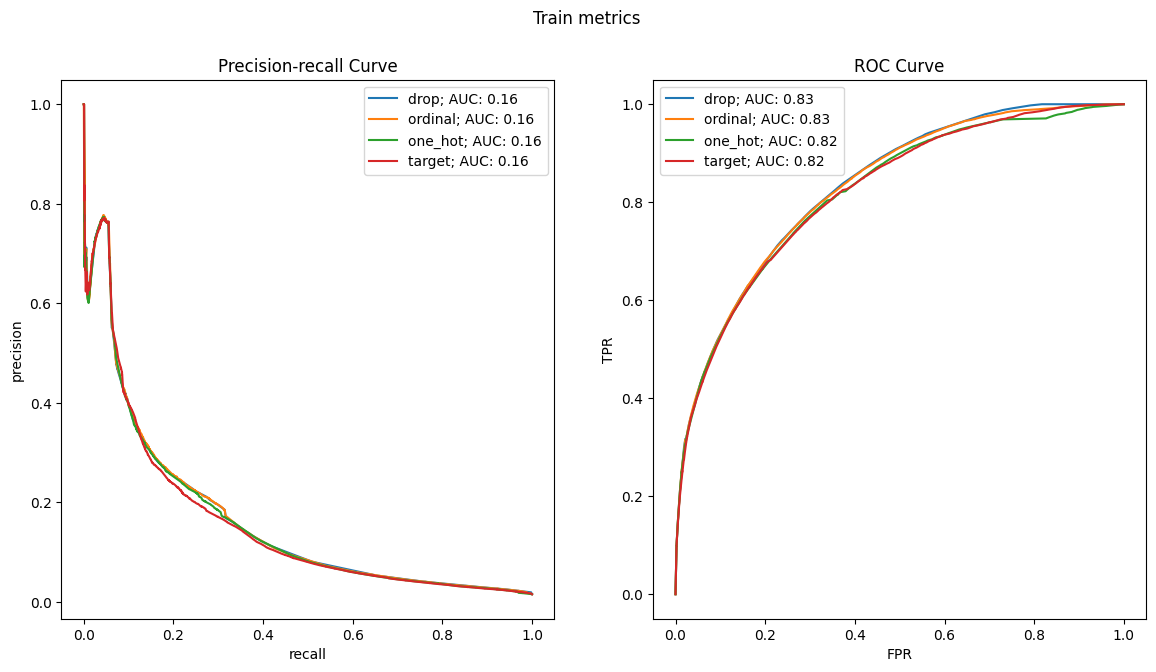

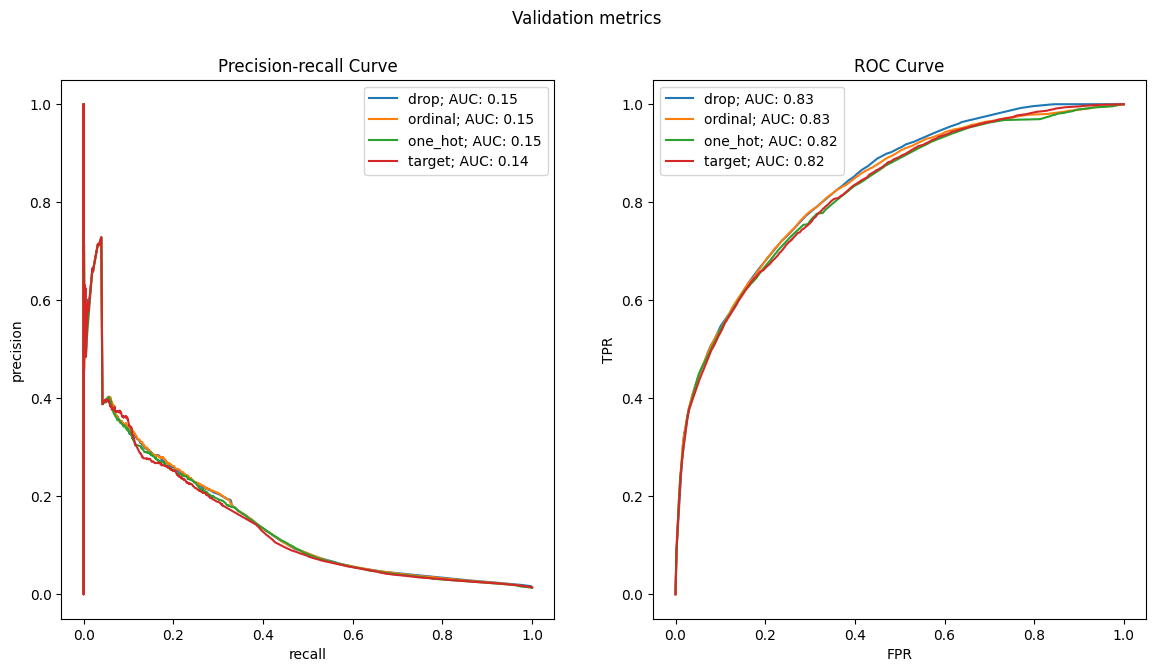

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder

categorical_preprocessor = [
    ("drop", "drop"),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    (
        "one_hot",
        OneHotEncoder(handle_unknown="ignore", max_categories=20, sparse_output=False),
    ),
    ("target", TargetEncoder(target_type="continuous"))
]

fig1, ax1 = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle("Train metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

extended_cols = reduced_cols + cateforical_cols

for name, categorical_preprocessor in categorical_preprocessor:
    processor= ColumnTransformer(
        [
            ("numerical_cols", "passthrough", reduced_cols),
            ("categorical", categorical_preprocessor, cateforical_cols),
        ]
    )
    lr = make_pipeline(
        processor,
        StandardScaler(),
        LogisticRegression(penalty="l2", C=1e-6)
    )

    lr.fit(X_train[extended_cols], y_train)
    train_proba = lr.predict_proba(X_train[extended_cols])[:, 1]
    plot_metrics(name, y_pred=train_proba, y_test=train_df[label_col], figure=(fig1, ax1))

    val_proba = lr.predict_proba(X_val[extended_cols])[:, 1]
    plot_metrics(name, y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2))
    